[Home](../../README.md)

### Model Training - Multifeature Regression

In this notebook, we will train a **Multifeature Regression model** to predict outcomes based on multiple features. Multifeature Regression assumes a linear relationship between the independent variables (features) and the dependent variables (targets). If the data exhibits non-linear patterns, we can extend this to **Polynomial Regression** to capture more complex relationships.

We will:
1. Load the dataset containing the features and target variables.
2. Train a **Linear Regression model** using multiple features.
3. Evaluate the model's performance using metrics like **R²** and **Mean Squared Error (MSE)**.
4. Save the trained model for future use.

If the model performs poorly, we can later explore **Polynomial Regression** to capture non-linear relationships.

#### Step 1

Load the required dependencies:

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle



#### Step 2

Store the data columns for Linear Regression.

In [4]:
# Load the training dataset
training_data = pd.read_csv('training_data.csv')

# Define features (X) and target (y)
features = ['Hand Strength', 'Max Rank Frequency']  # Add more features if needed
target = ['Fold', 'Check', 'Call', 'Raise', 'All-In']

X = np.array(training_data[features])
y = np.array(training_data[target])

# Display the first few rows of the dataset for verification
print("First few rows of the dataset:")
print(training_data.head())

First few rows of the dataset:
   Suit of Card 1  Suit of Card 2  Suit of Card 3  Suit of Card 4  \
0               1               0               0               0   
1               0               0               0               1   
2               0               1               0               0   
3               0               0               0               1   
4               1               0               1               0   

   Suit of Card 5  Rank of Card 1  Rank of Card 2  Rank of Card 3  \
0               0               7              10              12   
1               0              12               2               3   
2               1               3               6               6   
3               1               8               2               2   
4               0               3               3              13   

   Rank of Card 4  Rank of Card 5  ...  Unique Ranks  Unique Suits  Hand Type  \
0               4               7  ...             4      

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

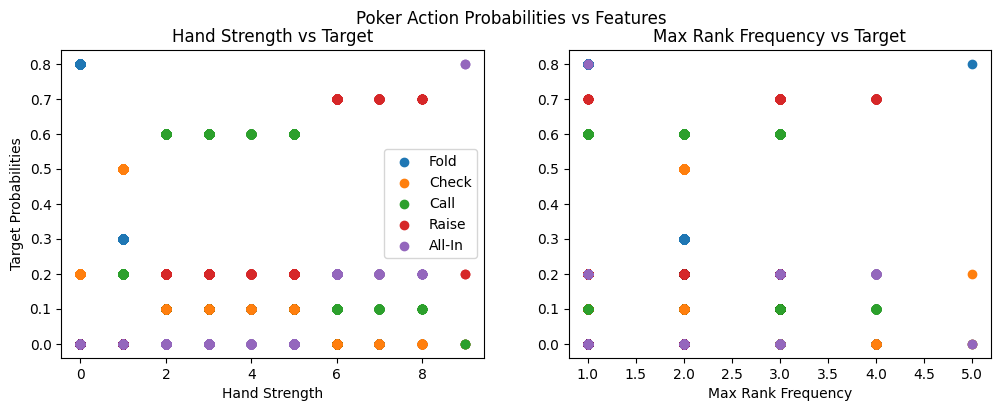

In [5]:
if len(features) == 1:
    # If there's only one feature, plot a scatter plot for all targets
    for i, action in enumerate(target):
        plt.scatter(X, y[:, i], marker='x', label=action)
    plt.title("Poker Action Probabilities vs Feature")
    plt.ylabel("Target Probabilities")
    plt.xlabel(features[0])
    plt.legend()
else:
    # If there are multiple features, create subplots for each feature
    fig, ax = plt.subplots(1, len(features), figsize=(12, 4))
    for i in range(len(ax)):
        for j, action in enumerate(target):
            ax[i].scatter(X[:, i], y[:, j], label=action)
        ax[i].set_xlabel(features[i])
        ax[i].set_title(f"{features[i]} vs Target")
    ax[0].set_ylabel("Target Probabilities")
    ax[0].legend()
    fig.suptitle("Poker Action Probabilities vs Features")
plt.show()

#### Step 4

We will now create polynomial features using the `PolynomialFeatures` class from Scikit-learn. The `degree` parameter determines the complexity of the polynomial terms:
- A degree of `1` corresponds to **Linear Regression**.
- Higher degrees (e.g., `2`, `3`) add more polynomial terms, allowing the model to capture non-linear relationships.

After creating the polynomial features, we will instantiate a **Linear Regression model** and store it in the `my_model` variable.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Create polynomial features
degree = 5  # Adjust the degree as needed
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(X)

# Create the Ridge Regression model
my_model = Ridge(alpha=1.0)  # Regularization strength (adjust alpha as needed)

# Fit the model to the data
my_model.fit(poly_features, y)

print(f"Model trained with polynomial degree {degree} using Ridge Regression.")

Model trained with polynomial degree 5 using Ridge Regression.


#### Step 5

Plot the features, targets and model (linear regression).

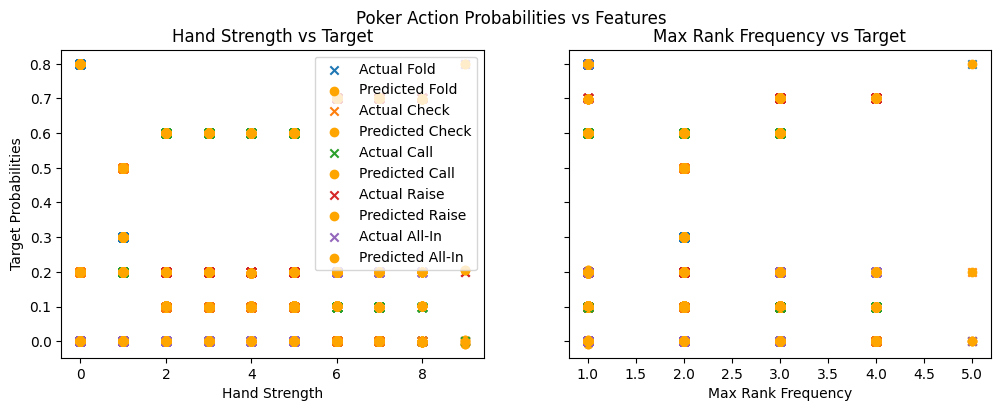

In [7]:
# Predict using the trained Ridge Regression model
y_pred = my_model.predict(poly_features)

# Plot the features, targets, and predictions
if len(features) == 1:
    # If there's only one feature, plot actual vs predicted probabilities
    for i, action in enumerate(target):
        plt.scatter(X, y[:, i], marker='x', c='r', label=f'Actual {action}')
        plt.scatter(X, y_pred[:, i], color='orange', label=f'Predicted {action}')
    plt.title("Poker Action Probabilities vs Feature")
    plt.ylabel("Target Probabilities")
    plt.xlabel(features[0])
    plt.legend()
else:
    # If there are multiple features, create subplots for each feature
    fig, ax = plt.subplots(1, len(features), figsize=(12, 4), sharey=True)
    for i in range(len(ax)):
        for j, action in enumerate(target):
            ax[i].scatter(X[:, i], y[:, j], marker='x', label=f'Actual {action}')
            ax[i].scatter(X[:, i], y_pred[:, j], color='orange', label=f'Predicted {action}')
        ax[i].set_xlabel(features[i])
        ax[i].set_title(f"{features[i]} vs Target")
    ax[0].set_ylabel("Target Probabilities")
    ax[0].legend()
    fig.suptitle("Poker Action Probabilities vs Features")
plt.show()

In [32]:
# save the model to disk
filename = 'my_saved_model_v3.sav'
pickle.dump(my_model, open('../2.4.Model_Testing_and_Validation/' + filename, 'wb'))